# Chronos Usage Example

## Loading Chronos Model

In [1]:
import os 
import sys
import torch
import numpy as np

src_path = os.path.abspath(os.path.join("..", "src"))
if src_path not in sys.path:
    sys.path.insert(0, src_path)

from samay.model import ChronosBoltModel
from samay.dataset import ChronosBoltDataset
# from tsfmproject.utils import load_args

# arg_path = "../config/timesfm.json"
# args = load_args(arg_path)
repo = "amazon/chronos-bolt-small"
chronos_model = ChronosBoltModel(repo=repo)


/nethome/hkamarthi3/scratch/Samay/.venv/lib/python3.11/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


Loading Chronos model from Huggingface repository


config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/191M [00:00<?, ?B/s]

## Define the datasets

In [2]:
train_dataset = ChronosBoltDataset(name="ett", datetime_col='date', path='../src/samay/models/moment/data/ETTh1.csv', 
                             mode='train', batch_size=8)
val_dataset = ChronosBoltDataset(name="ett", datetime_col='date', path='../src/samay/models/moment/data/ETTh1.csv', 
                             mode='test', batch_size=8)

## Visualize the zero-shot forecasting

/raid/hkamarthi3/Samay/src/samay/model.py:510: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  context = torch.tensor(context)
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


(465, 7, 512)


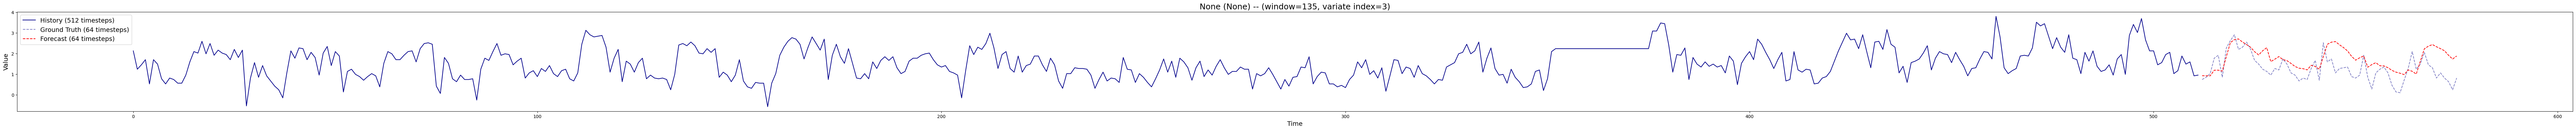

In [3]:
chronos_model.plot(val_dataset, horizon_len=64, quantile_levels=[0.1, 0.5, 0.9])

## Evaluate the zero-shot Chronos Model

In [4]:
metrics = chronos_model.evaluate(val_dataset, horizon_len=64, quantile_levels=[0.1, 0.5, 0.9])
print(metrics)

/raid/hkamarthi3/Samay/src/samay/model.py:552: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  context = torch.tensor(context)


{'mse': np.float64(9.816165257096971), 'mae': np.float64(1.5505705333008597), 'mase': np.float64(0.40170770265323935), 'mape': np.float64(1068.946606062415), 'rmse': np.float64(3.133076005636788), 'nrmse': np.float64(0.06823047999271774), 'smape': np.float64(0.3915590823851482), 'msis': np.float64(0.05567088751092204), 'nd': np.float64(0.4161415201466724), 'mwsq': np.float64(0.925224421444837), 'crps': np.float64(52.30858828869275)}


## Finetune Chronos Model on the ETT dataset

In [5]:
chronos_model.finetune(train_dataset)

Epoch 0, Loss: 31.377015804334146
Epoch 1, Loss: 29.22735953577524
Epoch 2, Loss: 42.881119529335045
Epoch 3, Loss: 36.510374999915705
Epoch 4, Loss: 32.615329802648596
Epoch 5, Loss: 28.95953608760018
Epoch 6, Loss: 27.67125716361409
Epoch 7, Loss: 26.88941504292489
Epoch 8, Loss: 26.115773259227584
Epoch 9, Loss: 25.544042750780676


## Evaluate the Finetuned Chronos Model

In [6]:
metrics = chronos_model.evaluate(val_dataset, horizon_len=64, quantile_levels=[0.1, 0.5, 0.9])
print(metrics)

{'mse': np.float64(10.381344100070674), 'mae': np.float64(1.6539440448927825), 'mase': np.float64(0.4284887712760184), 'mape': np.float64(1223.140327848963), 'rmse': np.float64(3.222009326502745), 'nrmse': np.float64(0.07016722303984256), 'smape': np.float64(0.41659198440703316), 'msis': np.float64(0.062092753257647536), 'nd': np.float64(0.4438848632148432), 'mwsq': np.float64(1.9937639880860172), 'crps': np.float64(58.04207471061556)}
